In [57]:
### Importing essential libraries and modules..
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import datasets,layers,models

### Loading the Data..

In [9]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [16]:
X_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
X_test.shape

(10000, 32, 32, 3)

- Let's visualize the data..

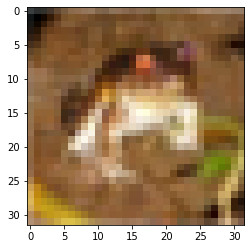

In [22]:
plt.imshow(X_train[0])### We can also use plt.matshow() method..

- Let's reduce the size for better visualization..

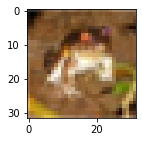

In [26]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])

In [31]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

AxesImage(27,27;167.4x163.08)
Text(0.5, 0, 'frog')


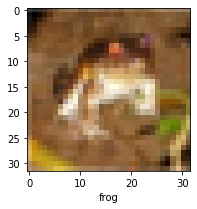

AxesImage(27,27;167.4x163.08)
Text(0.5, 0, 'truck')


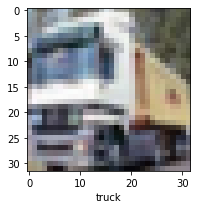

AxesImage(27,27;167.4x163.08)
Text(0.5, 0, 'truck')


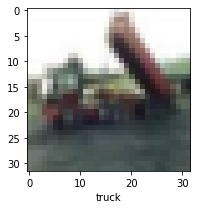

AxesImage(27,27;167.4x163.08)
Text(0.5, 0, 'deer')


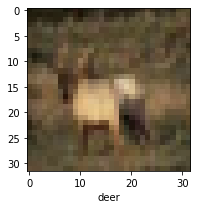

AxesImage(27,27;167.4x163.08)
Text(0.5, 0, 'automobile')


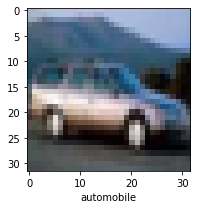

AxesImage(27,27;167.4x163.08)
Text(0.5, 0, 'automobile')


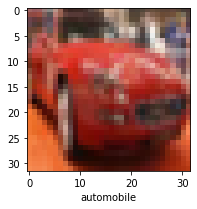

AxesImage(27,27;167.4x163.08)
Text(0.5, 0, 'bird')


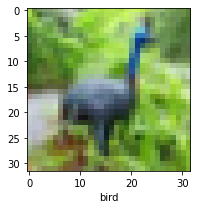

AxesImage(27,27;167.4x163.08)
Text(0.5, 0, 'horse')


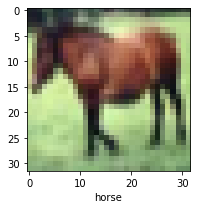

AxesImage(27,27;167.4x163.08)
Text(0.5, 0, 'ship')


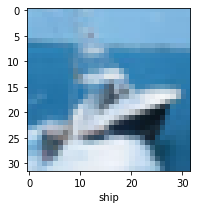

AxesImage(27,27;167.4x163.08)
Text(0.5, 0, 'cat')


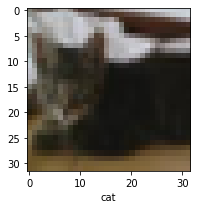

In [39]:
for i in range(10):
    plt.figure(figsize=(3,3))
    print(plt.imshow(X_train[i]))
    print(plt.xlabel(classes[y_train[i][0]]))
    plt.show()

In [47]:
y_train.reshape(-1)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

- Let's create a function which can show images and corrosponding labels by only taking the index as the input.

In [50]:
def show_image(X,y,index):
    plt.figure(figsize=(3,3))
    print(plt.imshow(X[index]))
    print(plt.xlabel(classes[y[index][0]]))
    plt.show()

AxesImage(27,27;167.4x163.08)
Text(0.5, 0, 'horse')


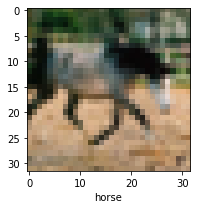

In [51]:
show_image(X_train,y_train,52)

- In our dataset all the images are RGB images and each image consists of 3 channels Red, Green and Blue and each channel have 255 pixels in it(each pixel represents a shead of that very colur)..

- It is a good practice to Normalize our data.. We just need to divide our training and testing data by 255 to normalize them..

In [52]:
X_train=X_train/255
X_test=X_test/255

In [56]:
X_test[0][0][:5]### All the values are between 0 to 1 Range..

array([[0.61960784, 0.43921569, 0.19215686],
       [0.62352941, 0.43529412, 0.18431373],
       [0.64705882, 0.45490196, 0.2       ],
       [0.65098039, 0.4627451 , 0.20784314],
       [0.62745098, 0.43921569, 0.18039216]])

In [59]:
X_train.shape

(50000, 32, 32, 3)

### Let's test the performance of Artificial Neural Network..

In [58]:
from keras.models import Sequential
from keras.layers import Dense

In [60]:
ann_model=keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(units=3000,activation='relu'),
    layers.Dense(units=1000,activation='relu'),
    layers.Dense(units=10,activation='sigmoid')
])

ann_model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

ann_model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 103s 65ms/step - loss: 1.8973 - accuracy: 0.3266
Epoch 2/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.6592 - accuracy: 0.4074
Epoch 3/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5776 - accuracy: 0.4350
Epoch 4/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5303 - accuracy: 0.4524
Epoch 5/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4901 - accuracy: 0.4708s -


In [61]:
ann_model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.4968 - accuracy: 0.4680


[1.4967848062515259, 0.46799999475479126]

### So ANN model is not giving good accuracy for this dataset..

> **Let's Try CNN instead..**

In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D2D

In [63]:
cnn_model=models.Sequential([
    
    ## CNN Implementation:
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    ## Dense Layer:
    
    layers.Flatten(),
    layers.Dense(units=64,activation='relu'),
    layers.Dense(units=32,activation='softmax')
    
    
    ## ANN Implementation:
    ##layers.Flatten(input_shape=(32,32,3)), We do not need to perform Flattening..CNN will take care of that automatically..
    ##layers.Dense(units=3000,activation='relu'),
    ##layers.Dense(units=1000,activation='relu'),
    ##layers.Dense(units=10,activation='softmax')##softmax function normalizes the probability..
])

cnn_model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

cnn_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5150 - accuracy: 0.4562
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1481 - accuracy: 0.5990
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0145 - accuracy: 0.6486
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9349 - accuracy: 0.6760
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8681 - accuracy: 0.6987
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8120 - accuracy: 0.7183
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7663 - accuracy: 0.7363
Epoch 8/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7255 - accuracy: 0.7491
Epoch 9/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6890 - accuracy: 0.7598
Epoch 10/10
1563/1563 [==============================] - 25s 16m

In [64]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9345 - accuracy: 0.6958


[0.9345316290855408, 0.6958000063896179]

In [65]:
pred=cnn_model.predict(X_test)

In [76]:
pred[0]

array([2.1737610e-04, 9.3987554e-05, 9.0537971e-04, 8.7655854e-01,
       1.6074524e-04, 1.1250716e-01, 8.7656435e-03, 8.6844404e-05,
       5.4872438e-04, 1.5565853e-04, 3.0585983e-18, 4.1019362e-19,
       4.9833251e-17, 6.6697995e-17, 3.0161933e-17, 1.4964711e-17,
       1.1544213e-18, 1.0665828e-17, 4.1953538e-18, 6.9281927e-18,
       2.1025450e-16, 9.9253518e-18, 3.2011295e-19, 2.7360172e-17,
       9.9772060e-18, 3.6667265e-19, 2.1979315e-17, 6.5649163e-17,
       7.9109502e-17, 3.9535650e-17, 5.0598509e-17, 2.0522409e-17],
      dtype=float32)

In [69]:
classes[np.argmax(pred[0])]

'cat'

In [75]:
classes[y_test[0][0]]

'cat'

### Let's check the performance of our model..

In [77]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9345 - accuracy: 0.6958


[0.9345316290855408, 0.6958000063896179]

In [78]:
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
final_pred=[]
for i in range(len(X_test)):
    final_pred.append(np.argmax(pred[i]))    

In [88]:
print(confusion_matrix(y_test.reshape(-1,),final_pred))
print(classification_report(y_test.reshape(-1,),final_pred))

[[780  18  32  16  22  11   4   6  71  40]
 [ 34 772   6   6   5   6   8   1  31 131]
 [ 91   7 491  54 142 104  42  36  15  18]
 [ 28  10  50 441 113 233  46  39  14  26]
 [ 24   1  33  35 746  62  26  55  13   5]
 [ 19   2  35  88  62 715  15  44   8  12]
 [ 10  11  48  65 115  59 666   6  11   9]
 [ 25   3  25  27  75  93   5 710   4  33]
 [ 80  32  11  13   6   5   4   8 808  33]
 [ 36  49   5  17  11  10   5  11  27 829]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1000
           1       0.85      0.77      0.81      1000
           2       0.67      0.49      0.57      1000
           3       0.58      0.44      0.50      1000
           4       0.58      0.75      0.65      1000
           5       0.55      0.71      0.62      1000
           6       0.81      0.67      0.73      1000
           7       0.78      0.71      0.74      1000
           8       0.81      0.81      0.81      1000
           9       0.73     

Text(87.0, 0.5, 'Actual_Values')

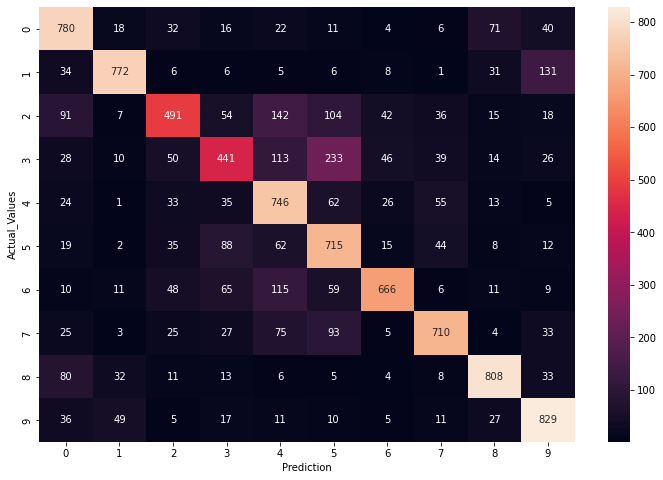

In [91]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test.reshape(-1,),final_pred),annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual_Values')